In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [4]:
data = pd.read_excel('/Users\CDEK\Downloads\office-28-10-2024--15_37.xls')

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\CDEK\AppData\Local\Temp\ipykernel_65340\1287984658.py:1: SyntaxWarning: invalid escape sequence '\C'
  data = pd.read_excel('/Users\CDEK\Downloads\office-28-10-2024--15_37.xls')


In [5]:
data.head()

,Код,Наименование,Наименование (Новое),Тип офиса,Тип владельца бизнеса,Офис ответственный за доставку,Город,Улица,Дом,Строение,...,Телефоны,Эл. почта,Дата открытия,Дата создания,Дата закрытия,ПВЗ по умолчанию,Минимальный вес,Максимальный вес,Категория,Районный центр
0,KZN63,"На Аграрной, 52","KZN63, ПВЗ, Казань, ул. Аграрная, 52, RU",Пункт выдачи заказов (ПВЗ),Франчайзи,"KZN17, ХАБ, Казань, ул. Техническая, 23А, RU",Казань,ул. Аграрная,52,NaN,...,+78432111920,v.losyugin@cdek.ru,2021-06-09,2021-06-09,NaN,Нет,0.0,50.0,Пункт выдачи заказов,Нет
1,KZN3,"На Спартаковской, 2к1 БЦ Караван","KZN3, ПВЗ, Казань, ул. Спартаковская, 2, RU",Пункт выдачи заказов (ПВЗ),Франчайзи,"KZN17, ХАБ, Казань, ул. Техническая, 23А, RU",Казань,ул. Спартаковская,2,корп.1,...,+78432588199,o.karyajnikova@cdek.ru,2014-12-03,2014-12-03,NaN,Нет,0.0,120.0,Пункт выдачи заказов,Нет
2,KZN26,На Даурской,"KZN26, ПВЗ, Казань, ул. Даурская, 44Д, RU",Пункт выдачи заказов (ПВЗ),Франчайзи,"KZN17, ХАБ, Казань, ул. Техническая, 23А, RU",Казань,ул. Даурская,44Д,NaN,...,+79393654555,v.salytov@cdek.ru,2019-01-14,2019-01-14,NaN,Нет,0.0,50.0,Пункт выдачи заказов,Нет
3,USA1,На Счастливой,"USA1, ПФО, Усады, Лаишевский район, ул. Счастл...",Полнофункциональный офис (ПФО),Франчайзи,NaN,"Усады, Лаишевский район",ул. Счастливая,11,NaN,...,+79969037779,r.vasilev@cdek.ru,2020-09-04,2020-09-04,NaN,Да,0.0,100000.0,Полнофункциональный офис,Нет
4,KZN271,Международный таможенный склад,"KZN271, ПФО, Казань, с. Столбище, Аэропорт Каз...",Полнофункциональный офис (ПФО),Франчайзи,NaN,Казань,"с. Столбище, Аэропорт Казань",терминал 2,NaN,...,+79520398060,i.timerkhanov@cdek.ru,NaN,2024-04-18,NaN,Нет,NaN,NaN,Полнофункциональный офис,Нет


In [12]:
a = data[['Код', 'работа_до_21']]

In [15]:
a.columns = ['kod', 'work_unit_21']

In [17]:
a.to_csv('work_unit_21.csv',index=False)

In [4]:
data[['График_работы_1', 'График_работы_2', 'График_работы_3']] = data['График работы'].str.split(', ', expand=True)

In [6]:
before_21 = ['Пн-Пт 10:00-21:00',
             'Пн-Вс 09:00-21:00',
             'Пн-Вс 10:00-21:00',
             'Пн-Пт 09:00-21:00',
             'Пн-Пт 08:00-21:00',
             'Пн-Сб 09:00-21:00',
             'Пн-Вс 10:00-22:00',
             'Пн-Пт 10:00-22:00',
             'Пн-Вс 00:00-24:00',
             'Пн-Пт 10:00-21:30',
             'Пн-Сб 10:00-21:00',
             'Пн-Пт 10:00-23:00',
            'Пн-Пт 00:00-24:00'
             ]

In [10]:
for i in range(len(data)):
    if data.loc[i,'График_работы_1'] in before_21:
        data.loc[i, 'работа_до_21'] = "Да"
    else:
        data.loc[i,'работа_до_21'] = "Нет"

In [8]:
weekday = data.pivot_table(index = 'Город',
                           columns = 'работа_до_21',
                           values = 'Код',
                           aggfunc = 'count').reset_index()
weekday['fraction'] = weekday['Работает'] / (weekday['Работает'] + weekday['Не_работает'])

weekday

работа_до_21,Город,Не_работает,Работает,fraction
0,Волгоград,17,27,0.613636
1,Воронеж,2,43,0.955556
2,Екатеринбург,3,97,0.970000
3,Казань,6,54,0.900000
4,Краснодар,2,112,0.982456
5,Красноярск,7,53,0.883333
6,Москва,104,290,0.736041
7,Нижний Новгород,34,8,0.190476
8,Новосибирск,18,69,0.793103
9,Омск,33,35,0.514706


In [7]:
data.loc[(data['Город'] == 'Санкт-Петербург') & (data['работа_до_21'] == 'Не_работает') ]

,Город,Наименование,Код,График работы,Дата открытия,Категория,График_работы_1,График_работы_2,График_работы_3,работа_до_21
1212,Санкт-Петербург,На Народного Ополчения 149,SPB1165,"Пн-Пт 10:00-20:00, Сб-Вс 10:00-18:00",2024-05-17,Пункт выдачи заказов,Пн-Пт 10:00-20:00,Сб-Вс 10:00-18:00,None,Не_работает
1276,Санкт-Петербург,Метро Большевиков,SPB166,"Пн-Пт 10:00-20:00, Сб-Вс 10:00-20:00",2020-07-06,Пункт выдачи заказов,Пн-Пт 10:00-20:00,Сб-Вс 10:00-20:00,None,Не_работает
1287,Санкт-Петербург,"На Просвещения, 62 лит А",SPB213,"Пн-Пт 09:00-20:00, Сб-Вс 10:00-20:00",2020-11-23,Пункт выдачи заказов,Пн-Пт 09:00-20:00,Сб-Вс 10:00-20:00,None,Не_работает


In [18]:
data['График_работы_1'].unique()

array(['Пн-Пт 10:00-21:00', 'Пн-Пт 10:00-20:00', 'Пн-Пт 08:00-20:00',
       'Пн-Пт 08:00-18:00', 'Пн-Вс 10:00-20:00', 'Пн-Вс 09:00-21:00',
       'Пн-Вс 10:00-21:00', 'Пн-Пт 09:00-21:00', 'Пн-Пт 09:00-20:00',
       'Пн-Пт 08:00-21:00', 'Пн-Сб 09:00-21:00', 'Пн-Вс 08:00-19:00',
       'Пн-Пт 10:00-19:00', 'Пн-Вс 10:00-22:00', 'Пн-Пт 10:00-22:00',
       'Пн-Вс 00:00-24:00', 'Пн-Пт 10:00-21:30', 'Пн-Сб 10:00-21:00',
       'Пн-Пт 09:00-20:30', 'Пн-Пт 10:00-23:00', 'Пн-Вс 09:00-20:00',
       'Пн-Пт 10:00-18:00', 'Пн-Вс 09:00-18:00', 'Пн-Пт 10:00-20:30',
       'Пн-Вс 08:00-17:00', 'Пн-Пт 00:00-24:00'], dtype=object)

In [20]:
before_20 = ['Пн-Вс 10:00-20:00',
             'Пн-Вс 09:00-21:00',
             'Пн-Вс 10:00-21:00',
             'Пн-Сб 09:00-21:00',
             'Пн-Вс 10:00-22:00',
             'Пн-Вс 00:00-24:00',
             'Пн-Сб 10:00-21:00',
             'Пн-Вс 09:00-20:00',
             'Сб-Вс 10:00-20:00',
             'Сб-Вс 10:00-21:00',
             'Сб-Вс 09:00-20:00',
             'Вс 10:00-20:00',
             'Сб-Вс 10:00-20:30',
             'Сб 10:00-20:00',
             'Сб-Вс 08:00-20:00',
             'Сб-Вс 00:00-24:00',
             'Сб-Вс 09:00-21:00'
            ]

In [24]:
for i in range(len(data)):
    if data.loc[i,'График_работы_1'] in before_20:
        data.loc[i, 'работа_до_20'] = "Да"
    elif data.loc[i,'График_работы_2'] in before_20:
        data.loc[i, 'работа_до_20'] = "Да"
    else:
        data.loc[i,'работа_до_20'] = "Нет"

In [26]:
b = data[['Код', 'работа_до_20']]

In [32]:
b.columns = ['kod', 'work_unit_20']

In [33]:
b.to_csv('work_unit_20.csv',index=False)

In [23]:
data.head()

,Город,Наименование,Код,График работы,Дата открытия,Категория,График_работы_1,График_работы_2,График_работы_3,работа_до_21,работа_до_20
0,Волгоград,На Энгельса 15,VLG31,"Пн-Пт 10:00-21:00, Сб-Вс 10:00-20:00",2020-03-31,Пункт выдачи заказов,Пн-Пт 10:00-21:00,Сб-Вс 10:00-20:00,None,Да,Работает
1,Волгоград,На Дегтярева,VLG24,"Пн-Пт 10:00-20:00, Сб-Вс 10:00-18:00",2019-06-24,Пункт выдачи заказов,Пн-Пт 10:00-20:00,Сб-Вс 10:00-18:00,None,Нет,Не_работает
2,Волгоград,"На Грибанова, 12",VLG65,"Пн-Пт 10:00-20:00, Сб-Вс 10:00-18:00",2021-10-22,Пункт выдачи заказов,Пн-Пт 10:00-20:00,Сб-Вс 10:00-18:00,None,Нет,Не_работает
3,Волгоград,На Новороссийской 8,VLG140,"Пн-Пт 10:00-21:00, Сб-Вс 10:00-20:00",2023-12-01,Пункт выдачи заказов,Пн-Пт 10:00-21:00,Сб-Вс 10:00-20:00,None,Да,Работает
4,Волгоград,"На Авторемонтной, 11В",VLG136,"Пн-Пт 08:00-20:00, Сб 10:00-18:00, Вс 10:00-16:00",2023-09-01,Пункт выдачи заказов,Пн-Пт 08:00-20:00,Сб 10:00-18:00,Вс 10:00-16:00,Нет,Не_работает


In [12]:
data.at [782, 'работа_до_20'] = 'Не_работает'

In [13]:
weekends = data.pivot_table(index = 'Город',
                           columns = 'работа_до_20',
                           values = 'Код',
                           aggfunc = 'count').reset_index().fillna(0)
weekends['fraction'] = weekends['Работает'] / (weekends['Работает'] + weekends['Не_работает']) * 100

weekends

работа_до_20,Город,Не_работает,Работает,fraction
0,Волгоград,17.0,27.0,61.363636
1,Воронеж,0.0,45.0,100.000000
2,Екатеринбург,11.0,89.0,89.000000
3,Казань,25.0,35.0,58.333333
4,Краснодар,9.0,105.0,92.105263
5,Красноярск,21.0,39.0,65.000000
6,Москва,180.0,214.0,54.314721
7,Нижний Новгород,40.0,2.0,4.761905
8,Новосибирск,57.0,30.0,34.482759
9,Омск,26.0,42.0,61.764706


In [14]:
data.loc[(data['работа_до_20']== 'Работает') & (data['График_работы_3'] == 'Вс 10:00-19:00')]

,Город,Наименование,Код,График работы,Дата открытия,Категория,График_работы_1,График_работы_2,График_работы_3,работа_до_21,работа_до_20


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Город            1518 non-null   object
 1   Наименование     1518 non-null   object
 2   Код              1518 non-null   object
 3   График работы    1518 non-null   object
 4   Дата открытия    1495 non-null   object
 5   Категория        1518 non-null   object
 6   График_работы_1  1518 non-null   object
 7   График_работы_2  1382 non-null   object
 8   График_работы_3  3 non-null      object
 9   работа_до_21     1518 non-null   object
 10  работа_до_20     1518 non-null   object
dtypes: object(11)
memory usage: 130.6+ KB


In [16]:
df = data[['Город','Код', 'График_работы_1', 'График_работы_2', 'График_работы_3']]

In [17]:
df.head()

,Город,Код,График_работы_1,График_работы_2,График_работы_3
0,Волгоград,VLG31,Пн-Пт 10:00-21:00,Сб-Вс 10:00-20:00,None
1,Волгоград,VLG24,Пн-Пт 10:00-20:00,Сб-Вс 10:00-18:00,None
2,Волгоград,VLG65,Пн-Пт 10:00-20:00,Сб-Вс 10:00-18:00,None
3,Волгоград,VLG140,Пн-Пт 10:00-21:00,Сб-Вс 10:00-20:00,None
4,Волгоград,VLG136,Пн-Пт 08:00-20:00,Сб 10:00-18:00,Вс 10:00-16:00


In [18]:
df[['day', 'hour']] = df['График_работы_1'].str.split(' ', expand=True)
df[['hour_start', 'hour_end']] = df['hour'].str.split('-', expand=True)

C:\Users\CDEK\AppData\Local\Temp\ipykernel_78964\3570543789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['day', 'hour']] = df['График_работы_1'].str.split(' ', expand=True)
C:\Users\CDEK\AppData\Local\Temp\ipykernel_78964\3570543789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['day', 'hour']] = df['График_работы_1'].str.split(' ', expand=True)
C:\Users\CDEK\AppData\Local\Temp\ipykernel_78964\3570543789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [19]:
df['hour_start'] = df['hour_start'].str.replace(':00','')
df['hour_end'] = df['hour_end'].str.replace(':00','')
df['hour_end'] = df['hour_end'].str.replace(':30','.5')

C:\Users\CDEK\AppData\Local\Temp\ipykernel_78964\18265687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour_start'] = df['hour_start'].str.replace(':00','')
C:\Users\CDEK\AppData\Local\Temp\ipykernel_78964\18265687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour_end'] = df['hour_end'].str.replace(':00','')
C:\Users\CDEK\AppData\Local\Temp\ipykernel_78964\18265687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [21]:
df[['hour_start', 'hour_end']] = df[['hour_start', 'hour_end']].astype('float')

C:\Users\CDEK\AppData\Local\Temp\ipykernel_78964\1230954715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['hour_start', 'hour_end']] = df[['hour_start', 'hour_end']].astype('float')


In [22]:
df['delta'] = df['hour_end'] - df['hour_start']

C:\Users\CDEK\AppData\Local\Temp\ipykernel_78964\3072585687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delta'] = df['hour_end'] - df['hour_start']


In [23]:
delta = df['delta'].value_counts().reset_index().sort_values(by ='delta')

In [24]:
delta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 7 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   delta   9 non-null      float64
 1   count   9 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 216.0 bytes


In [25]:
delta['delta'] = delta['delta'].astype(str) 

In [26]:
delta['fraction'] = delta['count'] / delta['count'].sum()*100
delta.columns = ['время_работы', 'кол-во_офисов', 'доля_%']

In [27]:
delta

,время_работы,кол-во_офисов,доля_%
7,8.0,1,0.065876
5,9.0,3,0.197628
2,10.0,188,12.384717
8,10.5,1,0.065876
0,11.0,1030,67.852437
4,11.5,6,0.395257
1,12.0,278,18.313570
3,13.0,8,0.527009
6,24.0,3,0.197628


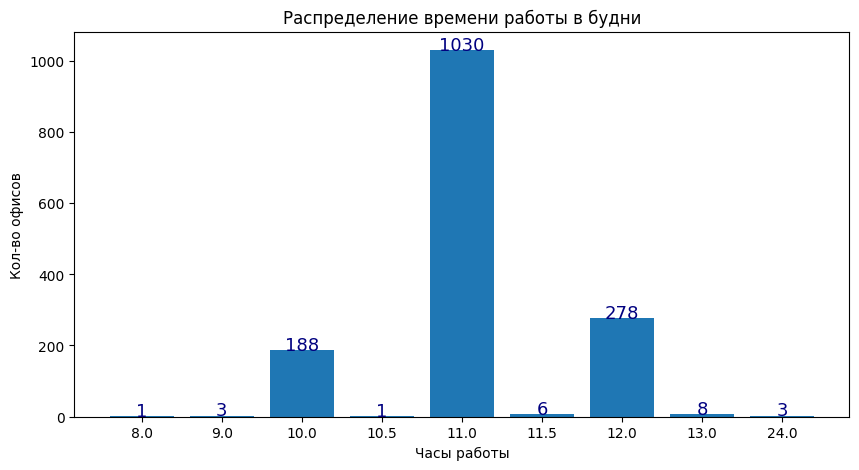

In [50]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i], y[i], y[i], ha = 'center', color='navy',fontsize=13)
 
if __name__ == '__main__':
   
    plt.figure(figsize = (10,5))
     
    plt.bar(delta['время_работы'], delta['кол-во_офисов'])
    addlabels(delta['время_работы'], delta['кол-во_офисов'])
    plt.title("Распределение времени работы в будни")
    plt.xlabel("Часы работы")
    plt.ylabel("Кол-во офисов")
    plt.show()

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Город            1518 non-null   object 
 1   Код              1518 non-null   object 
 2   График_работы_1  1518 non-null   object 
 3   График_работы_2  1382 non-null   object 
 4   График_работы_3  3 non-null      object 
 5   day              1518 non-null   object 
 6   hour             1518 non-null   object 
 7   hour_start       1518 non-null   float64
 8   hour_end         1518 non-null   float64
 9   delta            1518 non-null   float64
 10  day_2            1382 non-null   object 
 11  hour_2           1382 non-null   object 
 12  hour_start_2     1382 non-null   float64
 13  hour_end_2       1382 non-null   float64
 14  delta_2          1382 non-null   float64
 15  day_3            3 non-null      object 
 16  hour_3           3 non-null      object 
 17  hour_start_3  

In [211]:
print(df.day.unique())
print(df.day_2.unique())
print(df.day_3.unique())

['Пн-Пт' 'Пн-Вс' 'Пн-Сб']
['Сб-Вс' 'Сб' None 'Вс']
[None 'Вс']


In [212]:
df.head()

,Город,Код,График_работы_1,График_работы_2,График_работы_3,day,hour,hour_start,hour_end,delta,...,day_3,hour_3,hour_start_3,hour_end_3,delta_3,Рабочий день,hour_work,hour_saturday,hour_sunday,выходной
0,Волгоград,VLG31,Пн-Пт 10:00-21:00,Сб-Вс 10:00-20:00,None,Пн-Пт,10:00-21:00,10.0,21.0,11.0,...,None,None,NaN,NaN,NaN,Да,11.0,10.0,10.0,NaN
1,Волгоград,VLG24,Пн-Пт 10:00-20:00,Сб-Вс 10:00-18:00,None,Пн-Пт,10:00-20:00,10.0,20.0,10.0,...,None,None,NaN,NaN,NaN,Да,10.0,8.0,8.0,NaN
2,Волгоград,VLG65,Пн-Пт 10:00-20:00,Сб-Вс 10:00-18:00,None,Пн-Пт,10:00-20:00,10.0,20.0,10.0,...,None,None,NaN,NaN,NaN,Да,10.0,8.0,8.0,NaN
3,Волгоград,VLG140,Пн-Пт 10:00-21:00,Сб-Вс 10:00-20:00,None,Пн-Пт,10:00-21:00,10.0,21.0,11.0,...,None,None,NaN,NaN,NaN,Да,11.0,10.0,10.0,NaN
4,Волгоград,VLG136,Пн-Пт 08:00-20:00,Сб 10:00-18:00,Вс 10:00-16:00,Пн-Пт,08:00-20:00,8.0,20.0,12.0,...,Вс,10:00-16:00,10.0,16.0,6.0,Да,12.0,8.0,6.0,NaN


In [60]:
df[['day_2', 'hour_2']] = df['График_работы_2'].str.split(' ', expand=True)
df[['hour_start_2', 'hour_end_2']] = df['hour_2'].str.split('-', expand=True)

In [61]:
df['hour_start_2'] = df['hour_start_2'].str.replace(':00','')
df['hour_end_2'] = df['hour_end_2'].str.replace(':00','')
df['hour_end_2'] = df['hour_end_2'].str.replace(':30','.5')

In [62]:
df[['hour_start_2', 'hour_end_2']] = df[['hour_start_2', 'hour_end_2']].astype('float')
df['delta_2'] = df['hour_end_2'] - df['hour_start_2']

In [66]:
df[['day_3', 'hour_3']] = df['График_работы_3'].str.split(' ', expand=True)
df[['hour_start_3', 'hour_end_3']] = df['hour_3'].str.split('-', expand=True)
df['hour_start_3'] = df['hour_start_3'].str.replace(':00','')
df['hour_end_3'] = df['hour_end_3'].str.replace(':00','')
df['hour_end_3'] = df['hour_end_3'].str.replace(':30','.5')
df[['hour_start_3', 'hour_end_3']] = df[['hour_start_3', 'hour_end_3']].astype('float')
df['delta_3'] = df['hour_end_3'] - df['hour_start_3']

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Город            1518 non-null   object 
 1   Код              1518 non-null   object 
 2   График_работы_1  1518 non-null   object 
 3   График_работы_2  1382 non-null   object 
 4   График_работы_3  3 non-null      object 
 5   day              1518 non-null   object 
 6   hour             1518 non-null   object 
 7   hour_start       1518 non-null   float64
 8   hour_end         1518 non-null   float64
 9   delta            1518 non-null   float64
 10  day_2            1382 non-null   object 
 11  hour_2           1382 non-null   object 
 12  hour_start_2     1382 non-null   float64
 13  hour_end_2       1382 non-null   float64
 14  delta_2          1382 non-null   float64
 15  day_3            3 non-null      object 
 16  hour_3           3 non-null      object 
 17  hour_start_3  

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Город            1518 non-null   object 
 1   Код              1518 non-null   object 
 2   График_работы_1  1518 non-null   object 
 3   График_работы_2  1382 non-null   object 
 4   График_работы_3  3 non-null      object 
 5   day              1518 non-null   object 
 6   hour             1518 non-null   object 
 7   hour_start       1518 non-null   float64
 8   hour_end         1518 non-null   float64
 9   delta            1518 non-null   float64
 10  day_2            1382 non-null   object 
 11  hour_2           1382 non-null   object 
 12  hour_start_2     1382 non-null   float64
 13  hour_end_2       1382 non-null   float64
 14  delta_2          1382 non-null   float64
 15  day_3            3 non-null      object 
 16  hour_3           3 non-null      object 
 17  hour_start_3  

In [104]:
for i in range(len(df['Город'])):
    if df.loc[i,'day'] in ['Пн-Вс']:
        df.loc[i,'hour_saturday'] = df.loc[i,'delta']
        df.loc[i,'hour_sunday'] = df.loc[i,'delta']

In [105]:
for i in range(len(df['Город'])):
    if df.loc[i,'day'] in ['Пн-Сб']:
                df.loc[i,'hour_saturday'] = df.loc[i,'delta_2']

In [106]:
for i in range(len(df['Город'])):
    if df.loc[i,'day_2'] in ['Сб']:
                df.loc[i,'hour_saturday'] = df.loc[i,'delta_2']

In [107]:
for i in range(len(df['Город'])):
    if df.loc[i,'day_2'] in ['Вс']:
                df.loc[i,'hour_sunday'] = df.loc[i,'delta_2']

In [108]:
for i in range(len(df['Город'])):
    if df.loc[i,'day_3'] in ['Вс']:
                df.loc[i,'hour_sunday'] = df.loc[i,'delta_3']

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Город            1518 non-null   object 
 1   Код              1518 non-null   object 
 2   График_работы_1  1518 non-null   object 
 3   График_работы_2  1382 non-null   object 
 4   График_работы_3  3 non-null      object 
 5   day              1518 non-null   object 
 6   hour             1518 non-null   object 
 7   hour_start       1518 non-null   float64
 8   hour_end         1518 non-null   float64
 9   delta            1518 non-null   float64
 10  day_2            1382 non-null   object 
 11  hour_2           1382 non-null   object 
 12  hour_start_2     1382 non-null   float64
 13  hour_end_2       1382 non-null   float64
 14  delta_2          1382 non-null   float64
 15  day_3            3 non-null      object 
 16  hour_3           3 non-null      object 
 17  hour_start_3  

In [148]:
df1 = df[['Город','Код','График_работы_1','График_работы_2', 'График_работы_3', 'hour_work', 'hour_saturday', 'hour_sunday']]

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i], y[i], y[i], ha = 'center', color='navy',fontsize=13)
 
if __name__ == '__main__':
   
    plt.figure(figsize = (10,5))
     
    plt.bar(delta['время_работы'], delta['кол-во_офисов'])
     
    # calling the function to add value labels
    addlabels(delta['время_работы'], delta['кол-во_офисов'])
     
    # giving title to the plot
    plt.title("Распределение времени работы в будни")
     
    # giving X and Y labels
    plt.xlabel("Часы работы")
    plt.ylabel("Кол-во офисов")
     
    # visualizing the plot
    plt.show()

In [143]:
def ptlo(x,y):
    delta = x.value_counts().reset_index().sort_values(by = y)
    delta[y] = delta[y].astype(str) 
    delta['fraction'] = delta['count'] / delta['count'].sum()*100
    delta.columns = ['время_работы', 'кол-во_офисов', 'доля_%']
    print(delta)

In [145]:
ptlo(df1['hour_sunday'],'hour_sunday')

  время_работы  кол-во_офисов     доля_%
2          6.0              1   6.666667
1          8.0              5  33.333333
3          9.0              1   6.666667
0         10.0              6  40.000000
5         11.0              1   6.666667
4         12.0              1   6.666667


In [140]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Город            15 non-null     object 
 1   Код              15 non-null     object 
 2   График_работы_1  15 non-null     object 
 3   График_работы_2  12 non-null     object 
 4   График_работы_3  1 non-null      object 
 5   hour_work        15 non-null     float64
 6   hour_saturday    15 non-null     float64
 7   hour_sunday      15 non-null     float64
dtypes: float64(3), object(5)
memory usage: 1.1+ KB


In [173]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Город            1518 non-null   object 
 1   Код              1518 non-null   object 
 2   График_работы_1  1518 non-null   object 
 3   График_работы_2  1382 non-null   object 
 4   График_работы_3  3 non-null      object 
 5   hour_work        1518 non-null   float64
 6   hour_saturday    1518 non-null   float64
 7   hour_sunday      1518 non-null   float64
dtypes: float64(3), object(5)
memory usage: 95.0+ KB


In [171]:
df1[df1['hour_sunday'].isna()]

,Город,Код,График_работы_1,График_работы_2,График_работы_3,hour_work,hour_saturday,hour_sunday


In [170]:
df1.loc[316,'hour_sunday'] = df1.loc[316,'hour_saturday'] 
df1.loc[691,'hour_sunday'] = df1.loc[691,'hour_saturday'] 

In [172]:
df1.loc[316] 

Город                      Краснодар
Код                           KSD219
График_работы_1    Пн-Пт 10:00-19:00
График_работы_2       Сб 10:00-16:00
График_работы_3                 None
hour_work                        9.0
hour_saturday                    6.0
hour_sunday                      6.0
Name: 316, dtype: object

In [201]:
def ptlo(x,y):
    delta = x.value_counts().reset_index().sort_values(by = y)
    delta[y] = delta[y].astype(str) 
    delta['fraction'] = delta['count'] / delta['count'].sum()*100
    delta.columns = ['время_работы', 'кол-во_офисов', 'доля_%']
    return delta

In [203]:
df3 = ptlo(df1['hour_sunday'],'hour_sunday')
df3

,время_работы,кол-во_офисов,доля_%
5,6.0,4,0.263505
1,8.0,293,19.301713
3,9.0,95,6.258235
0,10.0,933,61.462451
7,10.5,1,0.065876
4,11.0,86,5.665349
2,12.0,103,6.785244
6,24.0,3,0.197628


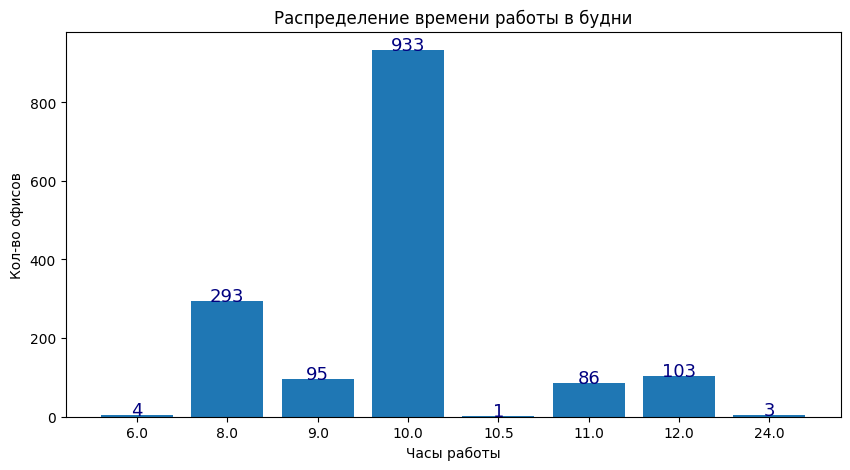

In [204]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i], y[i], y[i], ha = 'center', color='navy',fontsize=13)
 
if __name__ == '__main__':
   
    plt.figure(figsize = (10,5))
     
    plt.bar(df3['время_работы'], df3['кол-во_офисов'])
    addlabels(df3['время_работы'], df3['кол-во_офисов'])
    plt.title("Распределение времени работы в будни")
    plt.xlabel("Часы работы")
    plt.ylabel("Кол-во офисов")
    plt.show()